# Principle Component Analysis (PCA)
- Temel bileşen analizi (PCA), bu tür veri kümelerinin boyutsallığını azaltmak, yorumlanabilirliği arttırmak ve aynı zamanda bilgi kaybını en aza indirmek için bir tekniktir. Bunu, varyansı art arda maksimize eden yeni ilişkisiz değişkenler oluşturarak yapar.

### Nerelerde kullanılır?
- Feature Extraction
- Feature Dimension * feature sayısını azaltmak
- Stock Market Prediction
- Gene Data Analysis

Örneğin; PCA kullanarak 10 boyutlu bir datayı 2 boyuta indirip görselleştirebiliriz. <br>
Not: Olabildiğince varyansı büyük olmalı. <br>
Varyansı büyük olmak => datayı olabildiğince kaybetmemek.
<br><br><br>

Burada ki amaç 2 boyutu 1 boyuta indirmek.
- x1 için varyans => 5
- x2 için varyans = 5
- En büyük varyans => hipotenüs (principle component)

In [4]:
from IPython.display import Image
Image(url="./img/pca.png")

In [47]:
from sklearn.datasets import load_iris
import pandas as pd

In [48]:
# 4 feature var, 3 class var(target)
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
y = iris.target

In [49]:
df = pd.DataFrame(data,columns=feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
df["sinif"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
x = data

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True) 
    # n_components = kaç boyuta düşürmek istiyorsun
    # whitten = normalize
pca.fit(x) # y=label, x'in 4 boyutu 2'ye indir demek
x_pca = pca.transform(x) # dönüştürme işlemi tamamlandı

In [52]:
print("variance ratio: ", pca.explained_variance_ratio_) # principle,second component
print("sum:", sum(pca.explained_variance_ratio_)) # datanın %97'si sağlam

variance ratio:  [0.92461872 0.05306648]
sum: 0.9776852063187949


In [53]:
# 2D
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

In [54]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif,p1,p2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.945455,0.380686
146,6.3,2.5,5.0,1.9,2,0.742688,-0.761885
147,6.5,3.0,5.2,2.0,2,0.858033,0.160082
148,6.2,3.4,5.4,2.3,2,0.924462,0.236752


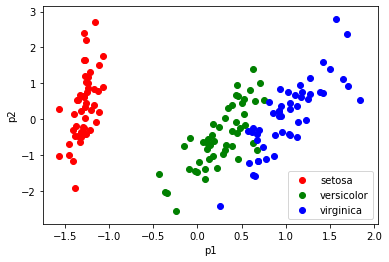

In [56]:
color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color=color[each],label=iris.target_names[each])
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()